In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [9]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_scaled= StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])

In [12]:
# Create a DataFrame with the scaled data
fb_marketplace= pd.DataFrame(
    market_scaled,
    columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]
)

# Copy the crypto names from the original DataFrame
fb_marketplace["coin_id"]=df_market_data.index

# Set the coin_id column as index
fb_marketplace=fb_marketplace.set_index("coin_id")

# Display the scaled DataFrame
fb_marketplace.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [13]:
# Create a list with the number of k-values from 1 to 11
k_vals=list(range(1,12))

In [14]:
# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k_vals:
    model=KMeans(n_clusters=i, random_state=1)
    model.fit(fb_marketplace)
    inertia.append(model.inertia_)

c:\Users\Valky\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Valky\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Valky\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Valky\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

In [16]:
# Create a dictionary with the data to plot the Elbow curve
bend_data={
    "k": k_vals,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
bendy_and_the_ink_machine=pd.DataFrame(bend_data)

In [18]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
bendy_and_the_ink_machine.hvplot.line(
    x="k",
    y="inertia",
    title= "Elbow Curve",
    xticks=k_vals
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Inertia is decreasing to begin to plataeu at k=4, this is the most significant drop observed and inertia continues to dwindle minimmally after k=7. The best value for k in this given scenario k would be k=4 since it represents a trade off between cluster sizes and simplicity as inertia doesn't continue decreasing by a large enough margin to warrant more clusters later. 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [19]:
# Initialize the K-Means model using the best value for k
model=KMeans(n_clusters=4)

In [20]:
# Fit the K-Means model using the scaled DataFrame
model.fit(fb_marketplace)

c:\Users\Valky\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
nerds=model.predict(fb_marketplace)

# Print the resulting array of cluster values.
print(nerds)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 2 0 1 1 3
 1 1 1 1]


In [22]:
# Create a copy of the scaled DataFrame
marketplace_predicts=fb_marketplace.copy()

In [23]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
marketplace_predicts["PredictedClusters"]=nerds

# Display the copy of the scaled DataFrame
marketplace_predicts.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,PredictedClusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [25]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
marketplace_predicts.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    hovercols="coin_id",
    by="PredictedClusters"
)

:NdOverlay   [PredictedClusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [26]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [27]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pacman=pca.fit_transform(fb_marketplace)

# View the scaled PCA data
pacman

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [29]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance comes out to 0.89503166 or 89%.

In [31]:
# Create a new DataFrame with the PCA data.
pacpac=pd.DataFrame(pacman, columns= ["PC1", "PC2", "PC3"])

# Copy the crypto names from the original scaled DataFrame
pacpac["coin_id"]=fb_marketplace.index

# Set the coin_id column as index
pacpac.set_index("coin_id", inplace=True)

# Display the scaled PCA DataFrame
pacpac

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [32]:
# Create a list with the number of k-values from 1 to 11
k=list(range(1,12))

In [33]:
# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model=KMeans(n_clusters=i, random_state=1)
    model.fit(pacpac)
    inertia.append(model.inertia_)

c:\Users\Valky\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Valky\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Valky\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Valky\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

In [36]:
# Create a dictionary with the data to plot the Elbow curve
bend_pca= {
    "k": k, 
    "inertia":inertia
    }
river=pd.DataFrame(bend_pca)


In [38]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
river.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve with PCA Data",
    xticks=k_vals
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The PCA data supports the K value fo 4 as that is the sharpest change.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, both data points support a k value of 4 and mirror the same dwindeling pattern after 7.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [39]:
# Initialize the K-Means model using the best value for k
kate_hudson=KMeans(n_clusters=4)

In [40]:
# Fit the K-Means model using the PCA data
kate_hudson.fit(pacpac)

c:\Users\Valky\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [41]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
potential_contracts=kate_hudson.predict(pacpac)

# Print the resulting array of cluster values.
print(potential_contracts)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [42]:
# Create a copy of the scaled PCA DataFrame
portmanteau=pacpac.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
portmanteau["clusters"]=potential_contracts

# Display the copy of the scaled PCA DataFrame
portmanteau

,PC1,PC2,PC3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


In [43]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
portmanteau.hvplot.scatter(
    x="PC1",
    y="PC2",
    hovercols= "coin_id",
    by="clusters"
).opts(yformatter="%.0f")

:NdOverlay   [clusters]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

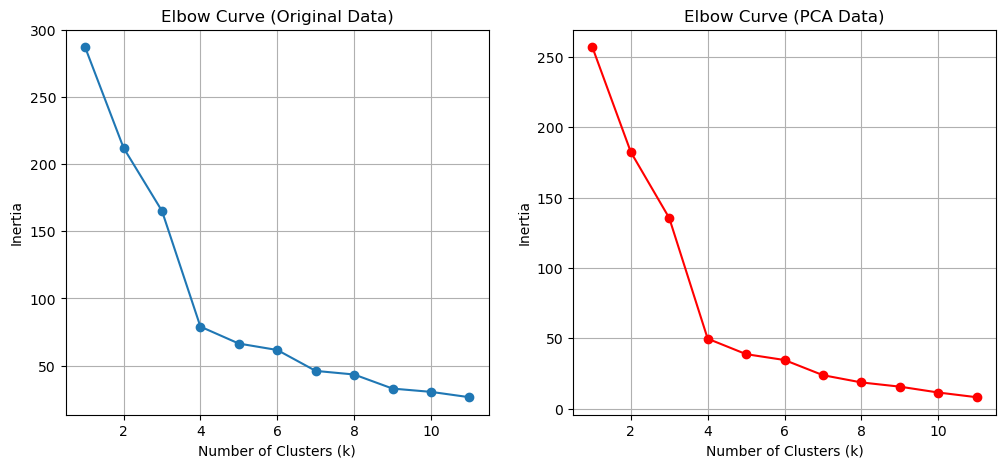

In [ ]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2, figsize=(12,5))
#origin elbow curve
ax[0].plot(bend_data["k"], bend_data["inertia"], marker="o", linestyle="-", label="Original Data")
ax[0].set_xlabel("Number of Clusters (k)")
ax[0].set_ylabel("Inertia")
ax[0].set_title("Elbow Curve (Original Data)")
ax[0].grid()
#pca elbow curve
ax[1].plot(river["k"], river["inertia"], marker="o", linestyle="-", label="PCA Data", color="red")
ax[1].set_xlabel("Number of Clusters (k)")
ax[1].set_ylabel("Inertia")
ax[1].set_title("Elbow Curve (PCA Data)")
ax[1].grid()

In [51]:
# Composite plot to contrast the clusters
origin = marketplace_predicts.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="PredictedClusters",
    title="Clusters (Original Data)"
)
pca = portmanteau.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="clusters",
    title="Clusters (PCA Data)"
)
origin + pca

:Layout
   .NdOverlay.I  :NdOverlay   [PredictedClusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [clusters]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using PCA results in a more condensed area of clusters while also highlighting outliers despite having the same amount of clusters in the orginal data. This can also mean that some nuanced information in the original dataset was lost in the transformation to PCA. Overall PCA is the preffered method in this analysis as it is structured more clearly and displays less noise giving a more abstract comparison. 